<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">

# Trabajo práctico 3
## Vision Transformer (ViT)

## Alumno
Denardi, Fabricio

## Cohorte
15-2024

# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item()
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}")
    ```


---

## 3. Finetuning

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

In [37]:
!pip install transformers
!pip install datasets
!pip install diffusers
!pip install accelerate
!pip install --upgrade jupyter ipywidgets

In [38]:
from datasets import load_dataset, DownloadConfig

# Dataset

Para la realización de este TP usaré un dataset de frutas y verduras.
Pueden ver más detalle de este conjunto de datos en el siguiente link:
https://huggingface.co/datasets/PedroSampaio/fruits-360

Nota: el dataset tiene más frutas que verduras por lo que se podrán ver muchos más ejemplos de las primeras que de las últimas. Al no estar etiquetadas por rubro (fruta o verdura), no puedo balancearlas.

De los datasets de frutas y verduras que estaban en hugging face, considero que el elegido es el que tenía más variedad y no presentaba errores al momento de entrenar.

## Justificiación de la elección
Seleccioné este dataset porque mi TP Final de la CEIA se trata de detección de alimentos para recomendar recetas. Considero que es un primer paso para sumergirme en el mundo de la visión por computadores en este espacio de trabajo.


### Eligimos un set de datos y lo traemos

In [39]:
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("PedroSampaio/fruits-360")

## Test / Validation
El dataset no tiene separado entre el subconjunto de test y validación, así que lo hacemos vía código.

In [40]:
# Divide el conjunto de test en test y validation (80-20% en este caso)
test_validation_split = dataset['test'].train_test_split(test_size=0.2, seed=42)

# Renombra las divisiones para que el dataset sea más claro
dataset['test'] = test_validation_split['train']     # 80% como test
dataset['validation'] = test_validation_split['test']  # 20% como validation

## Análisis del dataset

In [41]:
print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['label'].names)


print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de validación: {len(dataset['validation'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 67690
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 18150
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 4538
    })
})
{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red', 'Apple Red Delicious', 'Apple Red Yellow', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Carambula', 'Cauliflower', 'Cherry', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Haze

In [42]:
# Vamos a reducir el número de datos porque hace inviable el entrenamiento en Google Colab
percentaje = 0.1
dataset['train'] = dataset['train'].shuffle(seed=42).select(range(int(len(dataset['train']) * percentaje)))
dataset['test'] = dataset['test'].shuffle(seed=42).select(range(int(len(dataset['test']) * percentaje)))
dataset['validation'] = dataset['validation'].shuffle(seed=42).select(range(int(len(dataset['validation']) * percentaje)))

In [63]:
true_labels = dataset['train'].features['label'].names
true_labels_test = dataset['test'].features['label'].names


In [44]:
id2label = {i: label for i, label in enumerate(true_labels)}
label2id = {label: i for i, label in enumerate(true_labels)}

In [45]:
id2label = {i: label for i, label in enumerate(true_labels)}
label2id = {label: i for i, label in enumerate(true_labels)}

In [46]:
num_labels = len(true_labels)

### Eligimos un modelo pre entrenado y lo traemos

### Modelo elegido
Para este TP elegí Mobile VIT

#### Justificación de la elección del modelo
Elegí Mobile ViT siguiendo el hilo del dataset. Mi trabajo final de la CEIA requerirá clasificación y detección de alimentos, y la aplicación funcionará en un dispositivo móvil. Como primer acercamiento, quiero evaluar que tanto performa este tipo de modelos. Luego, en el futuro veré de hacer una API y que esta sea la encargada del procesamiento de las imágenes, pero a fines del TP de la materia, es una buena oportunidad de evaluar modelos alternativos.

In [47]:
from transformers import MobileViTImageProcessor, MobileViTForImageClassification

import torch
import matplotlib.pyplot as plt
from PIL import Image

import os, cv2, random, json


import time

In [48]:
image = dataset['train'][0]["image"]

In [49]:
image_processor =  MobileViTImageProcessor.from_pretrained("apple/mobilevit-xx-small")
model = MobileViTForImageClassification.from_pretrained("apple/mobilevit-xx-small")



loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--apple--mobilevit-xx-small/snapshots/5d26a9caff1254171068effb211e306f878b31b2/preprocessor_config.json
size should be a dictionary on of the following set of keys: ({'height', 'width'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}, {'max_height', 'max_width'}), got 288. Converted to {'shortest_edge': 288}.
crop_size should be a dictionary on of the following set of keys: ({'height', 'width'}, {'shortest_edge'}, {'shortest_edge', 'longest_edge'}, {'longest_edge'}, {'max_height', 'max_width'}), got 256. Converted to {'height': 256, 'width': 256}.
Image processor MobileViTImageProcessor {
  "crop_size": {
    "height": 256,
    "width": 256
  },
  "do_center_crop": true,
  "do_flip_channel_order": true,
  "do_flip_channels": true,
  "do_rescale": true,
  "do_resize": true,
  "image_processor_type": "MobileViTImageProcessor",
  "resample": 2,
  "rescale_factor": 0

#### Justificación del modelo pre entrenado
Quiero recordar que mi premisa es buscar un modelo liviano y simple, para que pueda funcionar en dispositivos móviles.

#### Ejemplo
Veamos un ejemplo para chequear el funcionamiento de nuestro código. Adicionalmente, al tratarse de dispstivos móviles, busqué alguno relacionado a estos, qué mejor que un dataset de apple para tomar como base. Esta basado en COCO como muchos de los modelos utilizados en visión por computadoreas..

Chequearemos entonces primero una imagen para asegurarnos que la importación del dataset sea la correcta:

In [50]:
inputs = image_processor(image, return_tensors="pt")

In [51]:
with torch.no_grad():
    logits = model(**inputs).logits


In [52]:
# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]

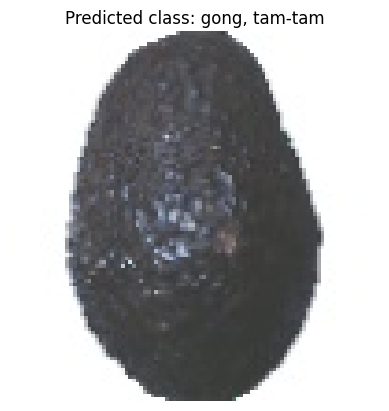

In [53]:
plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()

## Análisis
Veamos ahora algunas predicciones más antes de elaborar algunas credenciales.

In [54]:
SEED = 3465
IMAGES_QTY = 16

In [55]:
random_images = dataset["validation"].shuffle(seed=SEED).select(range(IMAGES_QTY))["image"]
random_labels = dataset["validation"].shuffle(seed=SEED).select(range(IMAGES_QTY))["label"]

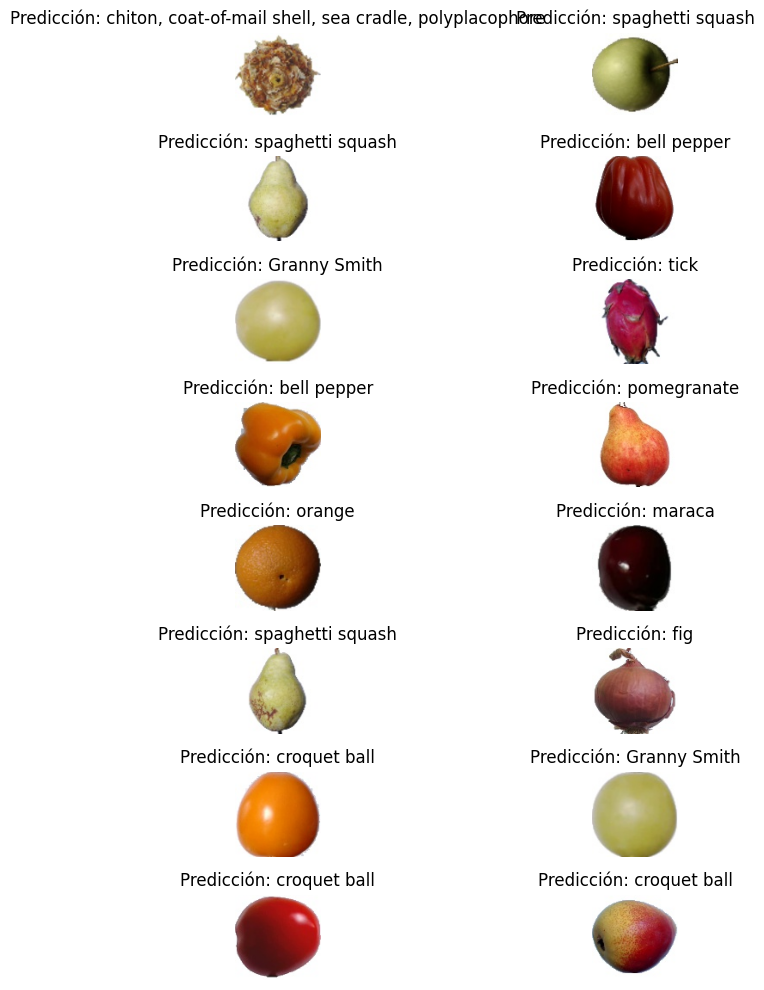

Tiempo de inferencia por imagen: 0.0757 segundos


In [56]:
fig, axes = plt.subplots(nrows=(IMAGES_QTY + 1) // 2, ncols=2, figsize=(10, 10))
start_time = time.time()
for i, image in enumerate(random_images):
    true_label = true_labels[random_labels[i]]
    inputs = image_processor(image, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits

    predicted_label = logits.argmax(-1).item()
    predicted_class = model.config.id2label[predicted_label]


    # Mostrar la imagen en el subplot
    ax = axes[i // 2, i % 2]
    ax.imshow(image)
    ax.axis('off')
    #ax.set_title(f'True:{true_label} / Predicción: {predicted_class}')
    ax.set_title(f'Predicción: {predicted_class}')

if IMAGES_QTY % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

end_time = time.time()  # Finalizar el temporizador

elapsed_time = end_time - start_time  # Calcular tiempo transcurrido
print(f"Tiempo de inferencia por imagen: {elapsed_time/IMAGES_QTY:.4f} segundos")

## Primeras conclusiones
1. La infrencia es realmente rápida. Sin utilizar GPU, en colab, es de ~ 1 segundo.

2. La performance es muy mala. Y esto tiene sentido, ya que se los pesos preentrenados son genéricos.  Más adelante veremos como impacta el *finetunning*

3. Las clases son distintas, por lo que no puedo establecer una métrica exacta. Sin embargo, podemos ver que el accuracy es muy baja. Podríamos decir que del 10 al 15 %. Siendo que son más de 130 clases, la heurística del promedio es menos del 1%, técnicamente es superior, aunque esperamos en un ambiente productivo que sea mucho mejor.


4. No lo dejé ejecutado, pero para intentar lograr una métrica exacta, también probé estableciendo las clases del dataset ya de ante mano:

```python
model = MobileViTForImageClassification.from_pretrained("apple/mobilevit-xx-small", num_labels= num_labels,ignore_mismatched_sizes=True)

model.config.id2label = id2label
model.config.label2id = label2id
```
Esto resultó poco performante, ninguna fruta fue correctamente detectada. Esto también tiene total sentido, ya que estoy usando otras clases a las entrenadas y solo evaluando (sin re entrentar). Más adelante, para el *finetunning* sí lo utilizaré y se mostrá las bondades de esto.


# Fine tunning del modelo
Ahora intentaremos realizar un finetunning para ver si mejoramos un poco la performance de este.

## Preprocesamiento y preparación del entorno

In [21]:
import numpy as np
from transformers import TrainingArguments, Trainer
from torch.utils.data import DataLoader

In [22]:
torch.set_float32_matmul_precision("medium") # optimizacion

In [23]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]

In [24]:
def transform(example):
     inputs = image_processor(images=example['image'], return_tensors="pt")
     example['pixel_values'] = inputs['pixel_values'].squeeze()  # Eliminar dimensión extra
     return example



In [25]:
train_dataset = train_dataset.map(transform)

Map:   0%|          | 0/6769 [00:00<?, ? examples/s]

In [26]:
test_dataset = test_dataset.map(transform)

Map:   0%|          | 0/1815 [00:00<?, ? examples/s]

In [27]:
train_dataset.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset.set_format(type='torch', columns=['pixel_values', 'label'])
test_dataset.set_format(type='torch', columns=['pixel_values', 'label'])

In [28]:
def preprocess_function(examples):
    inputs = image_processor(images=examples['image'], return_tensors="pt", padding=True)
    inputs['labels'] = torch.tensor([0] * len(examples['label']), dtype=torch.float)
    return inputs

## Entrenamiento

El primer paso es establecer el número de labels adecuado y configurar los mapeos con las clases del dataset

In [ ]:
model = MobileViTForImageClassification.from_pretrained("apple/mobilevit-xx-small", num_labels= num_labels,ignore_mismatched_sizes=True)

model.config.id2label = id2label
model.config.label2id = label2id

# Vamos a adaptar el modelo para que trabaje con las clases del dataset

In [30]:
training_args = TrainingArguments(
    output_dir="./vit-finetuned-mobilevit-xx-small",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    num_train_epochs=20,
    weight_decay=0.01,
    logging_dir='./logs',
    log_level = 'info',
    fp16 = True,
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [31]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

In [32]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset= train_dataset,
    eval_dataset= test_dataset,
    #compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
Using auto half precision backend


In [33]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 6,769
  Num Epochs = 20
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 2,120
  Number of trainable parameters = 987,297
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,3.408967
2,No log,2.550238
3,No log,1.670479
4,No log,1.246638
5,2.431900,0.813349
6,2.431900,0.542964
7,2.431900,0.440867
8,2.431900,0.301939
9,2.431900,0.274669
10,0.460000,0.187117


The following columns in the evaluation set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1815
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1815
  Batch size = 64
The following columns in the evaluation set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1815
  Batch si

TrainOutput(global_step=2120, training_loss=0.7184265762005212, metrics={'train_runtime': 2587.9925, 'train_samples_per_second': 52.311, 'train_steps_per_second': 0.819, 'total_flos': 1.5767206766051328e+17, 'train_loss': 0.7184265762005212, 'epoch': 20.0})

## Evaluación

In [34]:
eval_results = trainer.evaluate()
print(eval_results)

The following columns in the evaluation set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 1815
  Batch size = 64


{'eval_loss': 0.08664724975824356, 'eval_runtime': 24.907, 'eval_samples_per_second': 72.871, 'eval_steps_per_second': 1.164, 'epoch': 20.0}


In [35]:
test_loader = DataLoader(test_dataset, batch_size=32)

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 98.35%


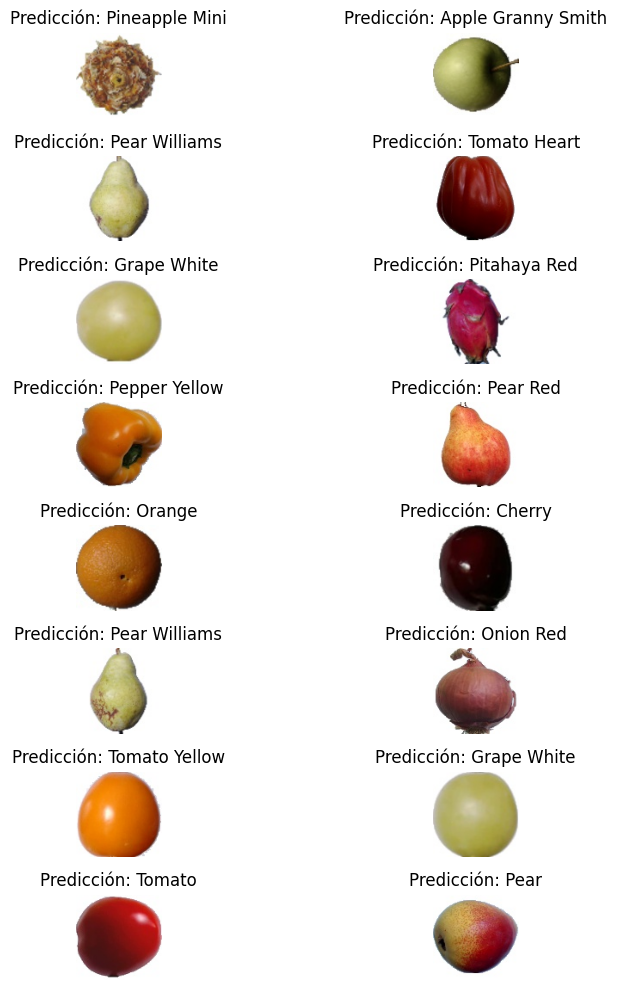

Tiempo de inferencia por imagen: 0.0647 segundos


In [36]:
fig, axes = plt.subplots(nrows=(IMAGES_QTY + 1) // 2, ncols=2, figsize=(10, 10))
start_time = time.time()
for i, image in enumerate(random_images):
    true_label = true_labels[random_labels[i]]

    inputs = image_processor(images=image, return_tensors="pt")
    pixel_values = inputs['pixel_values'].half().to(model.device)  # Convertir a float16 y mover al dispositivo


    with torch.no_grad():
        logits = model(pixel_values=pixel_values).logits

    predicted_label = logits.argmax(-1).item()
    predicted_class = model.config.id2label[predicted_label]


    # Mostrar la imagen en el subplot
    ax = axes[i // 2, i % 2]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Predicción: {predicted_class}')

if IMAGES_QTY % 2 != 0:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()

end_time = time.time()  # Finalizar el temporizador

elapsed_time = end_time - start_time  # Calcular tiempo transcurrido
print(f"Tiempo de inferencia por imagen: {elapsed_time/IMAGES_QTY:.4f} segundos")

In [57]:
outputs = trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `MobileViTForImageClassification.forward` and have been ignored: image. If image are not expected by `MobileViTForImageClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 1815
  Batch size = 64


In [58]:
outputs.metrics

{'test_loss': 0.08664724975824356,
 'test_runtime': 25.6264,
 'test_samples_per_second': 70.825,
 'test_steps_per_second': 1.132}

In [59]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

In [64]:
y_pred_filtered = np.where(y_pred < len(true_labels_test), y_pred, -1)

### Matriz de confusión
Dado que son más de 100 clases, resulta ilegible mostrarlas todas en una imagen en colab. Es por eso que presentaré aleatoriamente algunas para ver la excelente métrica lograda.

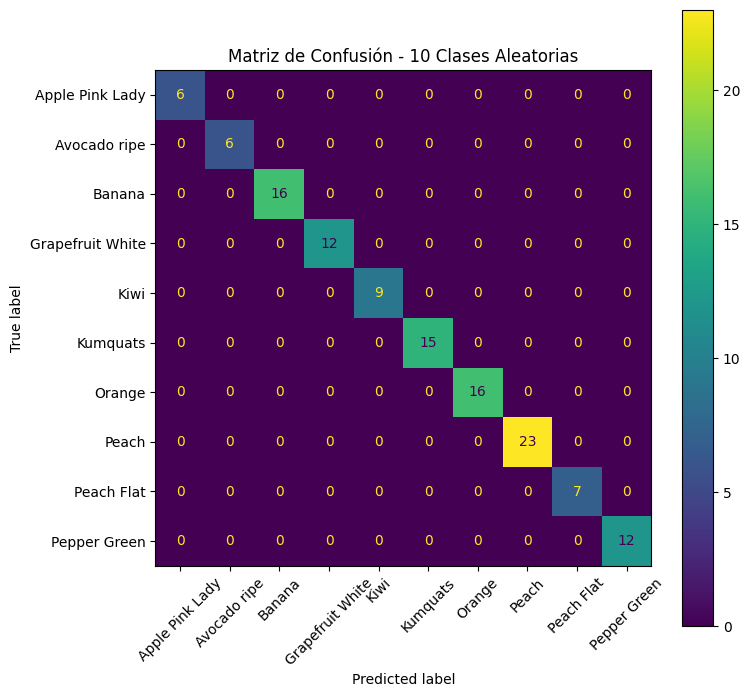

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión completa
cm = confusion_matrix(y_true, y_pred)
labels = train_dataset.features['label'].names

# Seleccionar 10 índices aleatorios de las clases
num_classes = len(labels)
random_indices = np.random.choice(num_classes, size=10, replace=False)
random_indices.sort()  # Ordenarlos para facilitar la interpretación

# Recortar la matriz de confusión y las etiquetas para estos índices aleatorios
cm_random = cm[random_indices][:, random_indices]
labels_random = [labels[i] for i in random_indices]

# Crear el display de la matriz de confusión con las etiquetas seleccionadas
disp = ConfusionMatrixDisplay(confusion_matrix=cm_random, display_labels=labels_random)
disp.plot(xticks_rotation=45)

# Ajustar el tamaño de la figura para mejorar la visualización
plt.gcf().set_size_inches(8, 8)
plt.title("Matriz de Confusión - 10 Clases Aleatorias")
plt.show()


# Conclusiones
1. Como podemos observar, el modelo aplicando *fine tunning* performó mucho mejor que el preentrenado base.

2. El *accuracy* fue de aproximadamente 98%: siendo que este es un modelo *straightforward* y solo se entrenaron 20 épocas, la performance lograda es excelente. Recordar que hay más de 100 clases, con lo cual la heurística del promedio sería 1%.

3. Como ya vimos en TPs pasados, la idea en un entorno productivo es aplicar CrossValidation o utilizar frameworks como Optuna para encontrar buenos hiperparámetros y así mejorar las métricas. Aunque los parámetros ahora elegidos fueron excelentes. Respecto a los parámetros base otorgados por los profesores de la materia, he modificado el learning rate y creo que eso fue determinante para lograr estas métricas.

4. Se puede extender este modelo a futuro a más frutas y verduras. Creo que es un buen punto de partida para mi TP Final.